# CSCI 1470 Lab 03: Introduction to TensorFlow #
***Important***: Before starting the lab please copy this notebook into your own google drive by clicking on "File" and "Save a copy in drive"

***NOTICE***: Please run this lab in Chrome or FireFox! Edge probably works fine too, idk. All I know is that Safari doesn't like Tensorboard (-_-')

----

In this lab, we will be introducing [TensorFlow](http://tensorflow.org/), a cutting-edge library for developing, and evaluating deep neural network models. As a quick motivator, let's at organize what we're going to talk about: 

### Here are some of the things **Tensorflow** offers:
- Object classes with build-in auto-diff tracking and associated workflows.
- Lots of already-implemented math modules (i.e. `tf.nn`, `tf.math`). 
- Nice built-in datasets and some other things...

### Here are some of the things **Keras** offers:
- Pre-built network components and structures to make life easier!
  - Pre-build and customizable network modules like entire layers/networks.
  - Modularized implementations of loss, accuracy, optimizers, etc.
  - Workflows to facilitate all of these!!

### Here are some nice benefits of knowing these:
- Extremely easy to prototype entire neural networks.
- LARGE amount of existing implementations and tutorials for getting to the cutting edge. 

---

> **NOTE:** PyTorch (and PyTorch/FastAI) is a popular alternative to TensorFlow/Keras. You'll probably have to use it eventually and should feel free to use it for your Final Project! With that said, please don't use it for the labs/homeworks! **Assume all labs and projects will utilize TensorFlow Version 2.5.0 or similar**. 


**Make sure to get all questions checked off by your TA to get credit for this lab!**

### Import Tensorflow

Run the following python code to make sure tensorflow is installed correctly and you're ready to go for running tensorflow.

In [3]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.8.0


# TensorFlow 101 - The Basics ##

Writing code in TensorFlow 2 is similar to writing code in Python. With eager execution (enabled in TensorFlow 2 by default), operations are evaluated immediately in an imperative programming environment. This makes operations return concrete values and makes things easier to debug, essentially what Python is doing. Also note that TensorFlow concepts correspond directly to Brunoflow concepts from class and the Autodiff Lab.



### Here are some of the things **Tensorflow** offers:
- Object classes with build-in auto-diff tracking and associated workflows.
- Lots of already-implemented math modules (i.e. `tf.nn`, `tf.math`). 
- Nice built-in datasets and some other things...

###Tensors###
A `Tensor` in TensorFlow is an object that represent a vector or matrix. They are effectively represented as a n-dimensional array and they have two properties: a shape and a data type (float32, int32, or string, for example). They are (kind of) like `np.arrays` but are immutable - you cannot update the contents of an existing tensor. A `Tensor` is analogous to a `Node` in Brunoflow. Both represent a node in the computation graph generated during runtime.

Consider the following example:

In [4]:
x = [[2.]]
m = tf.matmul(x,x)  # matrix multiplication 
print(f"x = {x}, m = {m}")
print(m)

x = [[2.0]], m = [[4.]]
tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


Here, `m` is a `Tensor`. We can easily inspect the result of the multiplication with a print() statement because tensors are treated as concrete values in Tensorflow 2. Doing so doesn't interfere with training a network either!

A `Tensor` contains the data, the shape, and the data type. As shown below

> `tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)`


This `Tensor` has the data `[2., 3., 4.]` with a shape of `(3, )` and the data is of type `float32`. Tensors can have more axes and can be indexed in the same way as you would index a NumPy array. For more detailed information on TensorFlow tensors, visit [this page](https://www.tensorflow.org/guide/tensor).

As for actually setting up a model, we need to introduce a few important Tensorflow constructs:

###Variables:### 

A big draw of Tensorflow is its ability to train various components during an optimization routine. This is largely facilitated by the `tf.Variable` class. On the surface, these are extremely similar to numpy arrays. However, their values can be automatically updated throughout optimization routines to progress towards a desirable configuration. 

`Variable` objects are a convenient way to represent trainable weights in your model. When using a variable, it must be initialized with starting values. The following are all valid ways of doing this:

In [5]:
# Using a python list
print("Python List Initialization\n", 
      tf.Variable([0,1]))

# Initializing variables with a NumPy array
print("\nNumpy-Based Initialization:\n", 
      tf.Variable(np.zeros((3,3))))

# You can also use some tensorflow built in variables
print("\nGaussian Normal Initialization:\n", 
      tf.Variable(tf.random.normal(shape=[3,3], stddev=.1)))

# To convert a variable from a tensor to a NumPy array, use the numpy() function
print("\nTensorflow To Numpy Array:\n", 
      tf.Variable([[1., 2., 5.]]).numpy())

Python List Initialization
 <tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([0, 1], dtype=int32)>

Numpy-Based Initialization:
 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float64, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])>

Gaussian Normal Initialization:
 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.02078905, -0.02273036,  0.07632606],
       [ 0.03164865,  0.01945226, -0.21302257],
       [-0.14524363,  0.20738934, -0.01653197]], dtype=float32)>

Tensorflow To Numpy Array:
 [[1. 2. 5.]]


In [6]:
tf.Variable(tf.random.normal(shape=[5,3], stddev=.1))

<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[ 0.011853  ,  0.01914714, -0.04044585],
       [ 0.00560139,  0.01019231,  0.07833377],
       [ 0.03897398,  0.0487245 , -0.0246457 ],
       [-0.05296586,  0.07736994,  0.06278355],
       [-0.14855048,  0.12077284, -0.0124524 ]], dtype=float32)>

In [7]:
a = tf.Variable([[1., 2., 5.]]).numpy()
a

array([[1., 2., 5.]], dtype=float32)

By default, TensorFlow variables are trainable. This means they will be watched and accounted for during automatic differentiation and backpropagation. For more information on tensorflow variables, check out the documentation: 
https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/Variable?hl=en 

###Gradient Tape:###

To compute the gradients with respect to the loss in our model, we need to make use of `tf.GradientTape()`. The purpose of this is to replace the need to specify all of the back-prop functionality like how you did it in Assignment 1. 

Any tensor computations inside the tape are recorded for use later, and can be used in routines that optimize their values during differentiation/backpropagation.

In [8]:
w = tf.Variable([[10.0]])
print(w)
with tf.GradientTape() as tape:
  loss = 2*w + 10*w 
  print(f"loss is {loss}")
  
grad = tape.gradient(loss, w) 
print(grad)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[10.]], dtype=float32)>
loss is [[120.]]
tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


In [9]:
w = tf.Variable([[1.0]])
print(w)
with tf.GradientTape() as tape:
  loss = w + w # loss = 1 + 1 = 2
  print(f"loss is {loss}")
  
grad = tape.gradient(loss, w) # grad is the gradient for function loss, which is 1 + 1 = 2
print(grad)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>
loss is [[2.]]
tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


Here the loss is calculated as `w + w` within the scope of `tf.GradientTape()`, so we are able to differentiate the loss with respect to the variable, `w`. This gradient is calculated in the call to `tape.gradient()`. `GradientTape()` can also compute gradients for non-trainable variables/tensors by using the `watch()` function:

In [10]:
x = tf.ones((2,2)) #Not a trainable variable!
print(x)
with tf.GradientTape() as tape:
  tape.watch(x)
  loss = 10*x + 20*x
  print(loss)
  
grad = tape.gradient(loss, x)
print(grad)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[30. 30.]
 [30. 30.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[30. 30.]
 [30. 30.]], shape=(2, 2), dtype=float32)


In [11]:
x = tf.ones((1, 1, 1))
x

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.]]], dtype=float32)>

For tips and tricks on automatic differentiation, check out the documentation: https://www.tensorflow.org/guide/autodiff


#### Purpose of AutoDiff

The GradientTape in TensorFlow keeps track of the Tensor computations that occur inside the tape and allow you to access gradients of individual Tensors with respect to computed values.

In order to perform automatic differentiation, TensorFlow uses the `GradientTape` to compute the gradient of computation during the forward pass with respect to a set of inputs and records this information onto the "tape". 

Calling `GradientTape.gradient(target, sources)` runs a backward pass along the tape and computes the gradient components of each differentiable unit along the path from `target` to `source`. These are accumulated and, per an optimization relying on the chain rule, combined into the resulting overall gradient. 

### Optimizers:###
Once we have the gradient computed with the GradientTape, we must update our weights for our model to train. For this we need to use an optimizer. In this class, you can use the Adam Optimizer. This optimizer is pretty standard, but examples of different types of optimizers are as follows:


```
adam_optimizer     = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd_optimizer      = tf.keras.optimizers.SGD(learning_rate=0.01) #Stochastic Gradient Descent
adagrad_optimizer  = tf.keras.optimizers.Adagrad(learning_rate=0.001)
rms_prop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
```

For now, don't worry about the details of how they work. You'll see soon in a future lab!



## Task: Putting it all Together
Now let's use everything we've learned to create our first TensorFlow 2 neural network.

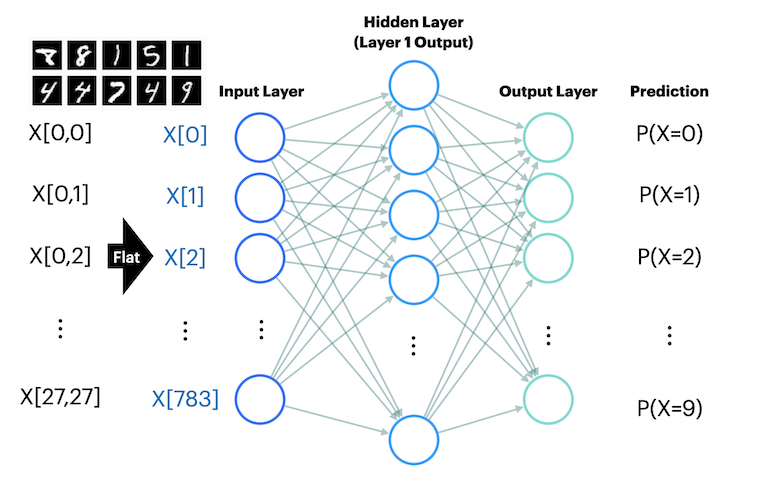

### The Dataset: 

We will be using your familiar MNIST dataset for this first attempt. We can pull in and pre-process this pretty easily by just using TF/Keras's provided dataset library. 

For loading and pre-processing, we need to: 
 - Pull in the dataset and split it into testing/training.
 - Normalize the input-likes into [0,1]. As we saw in Lab 2, not doing this can heavily distort optimization in specific contexts.
 - One-Hot Encode the labels. This converts a single-element categorical variable into a set of boolean indicators. Each indicator corresponds to a single category instance, and shows whether the specific category is present. 
  - For example, let's say we have a column with values 1 through 5. 
  The one-hot vector encoding of 4 would be <0,0,0,1,0>, where the 4th column indicates that this category instance is present. 
  - The reason for this is to remove ordering assumptions. For example, we do not want to treat this as a regression problem since we do not know if transitioning from one category to another makes sense. 

In [12]:
# Loading in dataset; split into training (X0,Y0) and testing (X1,Y1)
mnist = tf.keras.datasets.mnist
(X0, Y0), (X1, Y1) = mnist.load_data()

print(X0.shape)
print(X1.shape)
print(Y0.shape)
print(Y1.shape)
print(X0[0])
print()
# Normalize inputs and make sure they're float32
X0 = (X0 / 255.).astype(np.float32)
X1 = (X1 / 255.).astype(np.float32)

# Make labels one hot vectors
Y0 = tf.one_hot(Y0, 10)
Y1 = tf.one_hot(Y1, 10)

print(X0.shape)
print(X1.shape)
print(Y0.shape)
print(Y1.shape)
print(X0[0])

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 

Finally, we're ready to define and train a network to fit this dataset. 

We should encapsulate our code in a class so that our code is reusable and well-organized. A very convenient class that we've been given by TensorFlow to inherit from is `tf.keras.Model`. The example that follows is a possible way to inherit from `tf.keras.Model`. It is not necessarily the best way, since the accuracy/loss computations can also be modularized, but we'll get to that. 

Some useful base `tf.nn` methods (aka the basic math neural network ones)include: 
 - `tf.nn.softmax`
 - `tf.nn.relu` 

**Fill in the question marks below to complete the network:**

In [13]:
from numpy.core.fromnumeric import shape
class Model(tf.keras.Model):

  def __init__(self, **kwargs):
    # Putting *args and/or **kwargs as the last items in your function definition’s argument list 
    # allows that function to accept an arbitrary number of arguments and/or keyword arguments.


    """
    The model class inherits from tf.keras.Model.
    It stores the trainable weights as attributes.
    """
    super(Model, self).__init__(**kwargs) # look up Model's parent class, which is tf.keras.Model, and apply it to self, self is an instance of tf.keras.Model 
    
  
    # Initialize your variables (weights) here:
    # Think about using the gaussian_initialization example for these variables
    # Remember that the input size is 784 and the output size (number of classes) is 10 
    
    def create_variable(dims):  ## Easy initialization function for you :)
      return tf.Variable(tf.random.normal(dims, stddev=.1, dtype=tf.float32))

    self.W1 = create_variable([784,200])  # there is a two layer neural network  # using create_variable 
    self.b1 = create_variable([200])
    self.W2 = create_variable([200,10])
    self.b2 = create_variable([10])
  
  def call(self, inputs):
    """
    Forward pass, predicts labels given an input image using fully connected layers
    :return: the probabilites of each label
    """
    l1_out = tf.nn.relu(tf.matmul(inputs, self.W1) + self.b1) 
    # inputs is size: (batch_size x 784) and self.W1 is size (784 x 200)
    # use relu function and matrix multiplication 
    # remember to use a relu activation
    l2_out = tf.matmul(l1_out, self.W2) + self.b2
    # (batch_size x 200) and (200 x 10)
    prbs = tf.nn.softmax(l2_out)
    # apply softmax function in the end
    # print(f'the shape after the softmax is: {prbs.shape}')  
    # (1, 10)
    return prbs
  
  def loss(self, predictions, labels): # each entry of the predictions, the summation of the ten components is equal to 1 
    """
    Calculates the model loss
    :return: the loss of the model as a tensor
    """
    # this is the formula for cross entropy loss: L = -log(pa) where pa is the probability for the true class
    nll_comps = -labels * tf.math.log(tf.clip_by_value(predictions,1e-10,1.0)) 
    # labels[0] is a one hot encoding vector, with nine 0s and one 1 where 1 is the true class
    # something like this: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

    # tf.clip_by_valueL: everything in the predictions is between 1e-10 (the minimum) and 1.0 (the maximum)
    # tf.math.log: applying the log function to the predictions 


    # print(f'the shape for the labels is: {labels.shape}') 
    # (1, 10)

    # print(f'the shape for the predictions is: {predictions.shape}') 
    # (1, 10)

  
    # print(tf.math.log(tf.clip_by_value(predictions[0],1e-10,1.0)).numpy())
    # after applying log to the predictions[0]: [ -4.5568843   -8.981787    -4.8770185   -7.731712    -7.689494    -5.255968    -0.02821522   -10.69127     -5.6934137   -9.466492  ]
    # predictions[0] contains the soft max probability 

    """
    total_prob = 0
    for i in range(10):
      total_prob += predictions[0][i]
    print(f'total probability is equal to {total_prob}')
    # total probability is equal to 0.9999999403953552
    """


    # print(labels)
    # an example of the labels: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]



    # print(predictions.numpy())
    # an example of the predictions: [[0.02547424 0.09850796 0.0381446  0.21012509 0.20506997 0.05833828 0.14307038 0.04689172 0.0695704  0.10480734]]


    # print(nll_comps.numpy())
    # [[0.        0.        0.        0.        0.        1.6162685     0.      0.        0.        0.       ]]

    
    """
    print(f"this is the original: {nll_comps}")
    print(f'this is the reduce_sum: {tf.reduce_sum(nll_comps, axis=[1])}')
    print(f'this is the reduce_mean: {tf.reduce_mean(tf.reduce_sum(nll_comps, axis=[1]))}')
    
    this is the original: [[0.         0.         0.         0.         0.         0.00661398         0.         0.         0.         0.        ]]
    this is the reduce_sum: [0.00661398]
    this is the reduce_mean: 0.006613978650420904
    """

    """
    print(f'this is the reduce_sum with axis = 0: {tf.reduce_sum(nll_comps, axis = 0)}')
    this is the reduce_sum with axis = 0: [0.        0.        0.        0.        0.        1.4940116     0.       0.        0.        0.       ]
    """
    
    #  “axis 0” represents rows and “axis 1” represents columns

    return tf.reduce_mean(tf.reduce_sum(nll_comps, axis=[1])) 
    # axis = 0 doesn't work, the output is still a vector with nine 0s and one number 
    # reduce_mean remove the []

  
  def accuracy(self, predictions, labels):
    """
    Calculates the model accuracy
    :return: the accuracy of the model as a tensor
    """
    pred_classes = tf.argmax(predictions, 1)  # return the index of the maximum number in the array []
    true_classes = tf.argmax(labels, 1)
    correct_prediction = tf.equal(pred_classes, true_classes)

    """
    print(f'this is the shape of predictions: {predictions.shape}')
    # this is the shape of predictions: (60000, 10)

    print(f'this is the shape of labels: {labels.shape}')
    # this is the shape of labels: (60000, 10)
    """

    """
    print(f"this is the correct_prediction: {correct_prediction}")
    print(f"this is the shape of correct_prediction: {correct_prediction.shape}")

    this is the correct_prediction: [ True  True  True ...  True  True  True]
    this is the shape of correct_prediction: (60000,)
    """

    """
    print('this is tf.cast: ')
    print(tf.cast(correct_prediction, tf.float32))
    tf.Tensor([1. 1. 1. ... 1. 1. 1.], shape=(60000,), dtype=float32)
    """


    """
    print('this is tf.reduce_mean for tf.cast')
    print(tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy())
    0.08991667  # returns the accuracy score 
    """


    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # tf.cast convert boolean values in correct_prediction to float32 values

## END TODO
################################################################################

# Instantiate our model
model = Model()

# Choosing our optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Loop through training steps
train_steps = 2000                 ## Uncomment for quick run
train_steps = 5000               ## Uncomment for full run when ready
# train_steps = 10000              ## If you need this, maybe your architecture is a bit off?
for i in range(train_steps):     
  image = np.reshape(X0[i], (1,-1)) # reshape every image in train_steps into a row vector
  label = np.reshape(Y0[i], (1,-1))  # reshape every image in train_steps into a row vector

  """
  print(image.shape)
  print(label.shape)

  (1, 784)
  (1, 10)
  """

  # Implement backprop:
  with tf.GradientTape() as tape:
    y_pred = model.call(image)  # y_pred = model(image)  # this calls the call function conveniently
                                # model(image) is calling the call function defined in Model 


  # print(f'this is y_pred: {y_pred}')
  # this is y_pred: [[0.08879853 0.36401084 0.05961353 0.00773835 0.06351144 0.20420793  0.00821736 0.1093735  0.03336838 0.06116017]]
  

    loss = model.loss(y_pred, label)

    # print(loss.numpy())
      
    if i % 500 == 0:
      train_acc = model.accuracy(model.call(X0.reshape(-1,784)), Y0)
    # train_acc = model.accuracy(model(X0.reshape(-1,784)), Y0)  another way to write above code 

      print(f"Accuracy on training set after {i} training steps: {train_acc}")


      
  # The keras Model class has the computed property trainable_variables to conveniently
  # return all the trainable variables you'd want to adjust based on the gradients

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Accuracy on training set after 0 training steps: 0.07235000282526016
Accuracy on training set after 500 training steps: 0.7790666818618774
Accuracy on training set after 1000 training steps: 0.8441833257675171
Accuracy on training set after 1500 training steps: 0.8575000166893005
Accuracy on training set after 2000 training steps: 0.8612333536148071
Accuracy on training set after 2500 training steps: 0.8529333472251892
Accuracy on training set after 3000 training steps: 0.886983335018158
Accuracy on training set after 3500 training steps: 0.9038500189781189
Accuracy on training set after 4000 training steps: 0.9071000218391418
Accuracy on training set after 4500 training steps: 0.9020666480064392


In [14]:
print(f'original shape for X0[0]: {X0[0].shape}')
print(f'shape after applying .reshape(): {X0[0].reshape(-1, 784).shape}')  # convert everything to a row vector 

original shape for X0[0]: (28, 28)
shape after applying .reshape(): (1, 784)


In [15]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.reshape(a, (1, -1))
print(a)
print(b)

[[1 2 3]
 [4 5 6]]
[[1 2 3 4 5 6]]


In [16]:
x = tf.constant([[1, 2, 3, 4, 1]])
print(x)
y = tf.argmax(x, 1)
y.numpy()

tf.Tensor([[1 2 3 4 1]], shape=(1, 5), dtype=int32)


array([3])

In [17]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
a = tf.reduce_mean(x, axis = 0)
b = tf.reduce_mean(x, axis = 1)
print(x)
print(a)
print(b)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor([2 3 4], shape=(3,), dtype=int32)
tf.Tensor([2 5], shape=(2,), dtype=int32)


In [18]:
t1 = tf.constant([[-10., -1.33, 0.], [0.0000, 2.678, 10.]])
t2 = tf.clip_by_value(t1, clip_value_min=-1, clip_value_max=1)
print(t2)
t3 = t2.numpy()
print(t3)
t3.shape

tf.Tensor(
[[-1. -1.  0.]
 [ 0.  1.  1.]], shape=(2, 3), dtype=float32)
[[-1. -1.  0.]
 [ 0.  1.  1.]]


(2, 3)

In [19]:
t = tf.constant([1, 2, 3, 4, 5, 6, 7], dtype = tf.float64)
clip_value_min = 2
clip_value_max = 5
clip1 = tf.clip_by_value(t, clip_value_min, clip_value_max)
print(t)
clip1

tf.Tensor([1. 2. 3. 4. 5. 6. 7.], shape=(7,), dtype=float64)


<tf.Tensor: shape=(7,), dtype=float64, numpy=array([2., 2., 3., 4., 5., 5., 5.])>

**Note about model.trainable_variables:**
In the last 2 lines of the training loop above, we used `model.trainable_variables` to a get a list of all learnable variables in our model (`W1, b1, W2, b2` in this case). This feature was only available because our model subclasses `tf.Keras.Model`. Nevertheless, you can still optimize gradients and do backprop without subclassing `tf.Keras.Model` by passing in a list or array of the model's trainable variables manually like so:

```
gradients = tape.gradient(loss, [model.W1, model.b1, model.W2, model.b2]))
optimizer.apply_gradients(zip(gradients, [model.W1, model.b1, model.W2, model.b2]))
```

### **[Check-Off]** Training accuracy near 90% after (AT MOST) 10K steps
Have your lab TA check you off if your training accuracy is at or near 90%. It should converge after around 5K, but we'll give you up to 10K...


gradients = tape.gradient(loss, model.trainable_variables)

optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# Keras

**Note that you will not be allowed to use keras layer or loss shortcuts in your models until the language modeling assignments.**


Keras is a high-level API that is integrated with TensorFlow. Using calls to Keras, you can create networks more quickly and more readably. For example, you won't have to declare variables like `W1, b1, W2, b2` in your model constructor! 

**Functional API:** One really nice feature about Keras is its modular approach to model creation. You can specify a lot of small components to build up your network and switch out options as needed. 

With Tensorflow alone, you can do the following kinds of things: 

- `tf.nn` library: The "neural network" sub-library of tensorflow. It keeps normal tensor functions that operate... like regular functions. Give it an input and it will give you an output. Some common examples include: 
   - Activation functions: `softmax`, `relu`, etc.
   - Loss functions: `l2_loss`, `softmax_cross_entropy_with_logits`, etc.
   - Utility functions: `dropout`, `batch_normalize`, etc.
   - Much more that we haven't learned about yet.

- `tf.math` library: The "math" sub-library of tensorflow. Much more conceptual. You'll have to look at them later.

- **Many more options**

It seems like there are so many great options, but actually using these for specifying loss and optimizers would actually be doing it *the hard way*. The *easy way* is to use the higher-level Keras options: 

- [Keras Feedforward Layers](https://keras.io/api/layers/preprocessing_layers/)
   - `tf.keras.layers.Dense` class **!!!!!**
- [Keras Pre-Processing](https://keras.io/api/layers/preprocessing_layers/)
   - `tf.keras.layers.Normalization` class
   - `tf.keras.layers.CategoryEncoding` class
- [Keras Losses](https://keras.io/api/losses/)
   - `tf.keras.losses.BinaryCrossentropy` class
   - `tf.keras.losses.MeanSquaredError` class
   - `tf.keras.losses.categorical_crossentropy` function
- [Keras Metrics](https://keras.io/api/metrics/)
   - `tf.keras.metrics.Accuracy` class
   - `tf.keras.metrics.AUC` class
   - `tf.keras.metrics.MeanSquaredError` class
- [Keras Optimizers](https://keras.io/api/optimizers/)
   - `tf.keras.optimizers.RMSprop` class
   - `tf.keras.optimizers.SGD` class
   - `tf.keras.optimizers.Adam` class
- [So Many More](https://keras.io/api/layers/)

**NOTICE**: You might notice that most of these are "Classes". That means that they return an object which can then be called upon like a function. This is to allow the objects to have a sense of state, which may be important in some instances. 

 Below is the network you implemented above written in Keras. 



In [20]:
class ModelWithKeras(Model):  ## Taking the previous loss/accuracy script
# inherit from the class Model we defined above 

  def __init__(self, **kwargs):
    """
    The model class inherits from tf.keras.Model.
    It stores the trainable weights as attributes.
    """
    super(Model, self).__init__(**kwargs)
    
    self.dense1 = tf.keras.layers.Dense(100, activation='relu')     ## [?] -> 100 columns  # applying relu function 
    self.dense2 = tf.keras.layers.Dense(10,  activation='softmax')  ## 100 ->  10 columns  # applying softmax function 
  
  def call(self, inputs):
    """
    Forward pass, predicts labels given an input image using fully connected layers
    :return: the probabilites of each label
    """
    x = inputs               ## shape = [R,   C] for some R, C (could also be [B, R, C] with batches)   # rows, columns 
    x = self.dense1(x)       ## shape = [R, 100], already applied relu
    x = self.dense2(x)       ## shape = [R,  10], already applied softmax
    return x


You may thing "wow, that's neat" and you would be right! However, the keras class is actually way more powerful than that!

## Practical Skills: Using model.fit()

In the previous example, we had you using a `tf.keras.Model` subclass with manual accuracy/loss and an external optimization loop, but the model actually has a lot of that modularized for you if you so choose. 

One of the most powerful quality-of-life improvements offered by `tf.keras.Model` is the ability to use (and tweak) a default training loop! The following methods will be useful for this: 

- `model.compile()`: Takes in the model optimizer, loss function, and a list of metrics. These should be some of the Keras components specified earlier. These will be used for training/evaluation perposes automatically!
- `model.fit()`: Takes in train specifications and runs through the training loop. This already implements epochs, validation, batching, etc and relies on the `train_step` function. 
- `model.train_step()`: Takes in a set of data (by default, a single batch at a time) and optimizes for it. 
    - By Keras standards, this is the only method you should actually override regularly. 
- `model.evaluate()`: Evaluates model on a set using compiled metrics.
- `model.predict()`: Forward passes on a set of inputs. 
- `model()`: Alias for `model.predict()`

## Practical Skills: Using `keras.Sequential()`

Another common way to specify a model is to use the `Sequential` class. This one is quite simple; you just specify the layers to pass your inputs through, and the model just infers that the call function will just need to go through them one at a time! 

This version will be very useful in real-world scenarios as a model component; a lot of complicated models might have a lot of components, and having a sequential layer allows you to specify chaining components in easy-to-train variables. 

****

**PLEASE CHECK OUT THE ADJACENT EXAMPLES NOTEBOOK!** 

It shows a lot more examples of how to specify keras models!

****

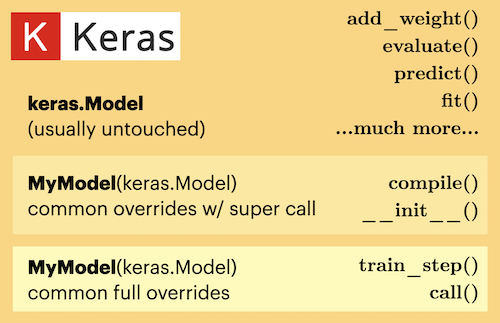

## EXERCISE: Iris Flower Dataset

In this example, you're going to play around with this and make a new model that is modularized up to the Keras standard. **Remember don't do this on your assignments until HW4!**

In your HW1, you worked on trying to classify hand-written digits. Now, let's learn to classify some flowers!

The [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) contains 150 entries with the following information: 
1. Sepal length in cm 
2. Sepal width in cm 
3. Setal length in cm 
4. Setal width in cm 
5. Class: 50 of each. 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

In [21]:
import tensorflow_datasets as tfds
import numpy as np

## Load in the dataset, do a 100-50 split; This is special tfds syntax
iris_train, iris_test = tfds.load('iris', split=['train[:100]', 'train[100:]'])


label_names = ['Setosa', 'Versicolour', 'Virginica']
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']

for i, row in enumerate(iris_train):
    if i > 5: break
    # print(f'i is: {i}')
    # print(f'row is: {row}')
    print(f"Row {i} : {row['features']} -> {row['label']} ({label_names[row['label']]})")

## Pull data from iterable-only dataset. NOT IMPORTANT
X0_iris = np.array([row['features']  for row in iris_train])
X1_iris = np.array([row['features']  for row in iris_test])
Y0_iris = np.array([row['label']     for row in iris_train]).reshape(-1, 1)
Y1_iris = np.array([row['label']     for row in iris_test ]).reshape(-1, 1)

print(f'''...
    Training Subset: {X0_iris.shape } -> {Y0_iris.shape}
    Testing Subset:  {X1_iris.shape}  -> {Y1_iris.shape}
''')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteWNUDXK/iris-train.tfrecord


  0%|          | 0/150 [00:00<?, ? examples/s]

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
Row 0 : [5.1 3.4 1.5 0.2] -> 0 (Setosa)
Row 1 : [7.7 3.  6.1 2.3] -> 2 (Virginica)
Row 2 : [5.7 2.8 4.5 1.3] -> 1 (Versicolour)
Row 3 : [6.8 3.2 5.9 2.3] -> 2 (Virginica)
Row 4 : [5.2 3.4 1.4 0.2] -> 0 (Setosa)
Row 5 : [5.6 2.9 3.6 1.3] -> 1 (Versicolour)
...
    Training Subset: (100, 4) -> (100, 1)
    Testing Subset:  (50, 4)  -> (50, 1)



### **[Exercise]** Implementing A Flower Classifier

For this, **implement a basic 2-layer perceptron in TF/Keras to classify the flowers!** 

Specifically, you'll implement it in two ways: 

- Using `Keras.Model` subclassing with the `.fit` method.
- Using `Sequential([])` to define your model by only providing a list of layers in the order you want your inputs to pass through!

Remember the following as you implement: 
- Implement it using the keras `Dense` layers. Pick however many nodes you think is ok per layer, and remember that biases are included by default for these.
    - Use Leaky ReLU as your non-output activation functions. They are generally pretty good for latent-space outputs. 
- This is a classification problem! You'll have to find a suitable loss function and metric...
    - For loss, you should use `tf.keras.losses.CategoricalCrossentropy`.
    - For metric, you should use `tf.keras.metrics.CategoricalAccuracy`

- You will need to normalize your inputs! Consider using [`tf.keras.layers.Normalization()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization). 
    - After you create your normalization layer which we'll call `norm`, you'll have to calibrate it to your data (remember, it's stateful). Feel free to use the built-in `adapt(X)` method. 
    - You will want to adapt it to the set containing both the training and testing inputs (i.e. `tf.concat`). This is because there might be anomolous examples in the testing features that would make the normalization ineffective across the entire dataset.
- You'll have to One-Hot Encode your outputs just like in the assignment. Consider using [`tf.keras.layers.CategoryEncoding()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding).

In [22]:
################################################################################
## TODO : Implement Components

class IrisModel1(tf.keras.Model):

    ############################################################################
    ## TODO : Implement IrisModel1 Components

    def __init__(self, **kwargs):
        '''Phase at which you should specify the variables needed to do passes'''
        super().__init__(**kwargs)  ## If there are other key-word arguments, pass them up
        self.dense1 = tf.keras.layers.Dense(100, activation='leaky_relu')  # [?] --> 100 columns    
        self.dense2 = tf.keras.layers.Dense(3,  activation='softmax') # 100 columns --> 3 columns 

    def call(self, inputs):
        '''Phase at which you specify forward propagation'''
        x = inputs   ## shape = [R,   C] for some R, C (could also be [B, R, C] with batches)
        x = self.dense1(x)      ## shape = [R, 100], already applied leaky_relu
        x = self.dense2(x)      ## shape = [R,  3], already applied softmax
        return x

    ## END TODO
    ############################################################################

    ## FEEL FREE TO COMMENT train_step OUT. This is the default implementation
    def train_step(self, data):

        '''
        Optional Train_Step Specification; This happens for every training batch
        Uncomment this if you want to customize something
        https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit
        '''


        x, y = data
        # x is in input features
        # y is the true label 
        
        """
        print()
        print('this is data: ')
        print(data)
        print()
        print('this is x: ')
        print(x)
        print()
        print('this is y: ')
        print(y)
        print()
        """

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # get the prediction using x 
            # y_pred should looks like this: [[0.08879853 0.36401084 0.05961353]]
            # self(x, training = True) is just like running the model using the call(self, inputs) function we defined in example class Model(tf.keras.Model):





            # Compute the loss value (the loss function is configured in `compile()`)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
            # compute the loss using the true label and the prediction

        # Compute gradients
        gradients = tape.gradient(loss, self.trainable_variables)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # Update metrics (includes the metric that tracks the loss)
        # get the accuracy score by comparing y and y_pred
        self.compiled_metrics.update_state(y, y_pred)

        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}


iris_model1 = IrisModel1(name='IrisModel1') 


iris_model2 = tf.keras.Sequential([    ## TODO: Implement This!
tf.keras.layers.Dense(units = 100, activation = "leaky_relu"),
tf.keras.layers.Dense(units = 3, activation='softmax')

], name='IrisModel2')

norm = tf.keras.layers.Normalization()                 ## TODO: Normalizer for Features
oher = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="one_hot")           ## TODO: One-Hot Encoder For Labels

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)                                       ## TODO: Pick an optimizer
loss     = tf.keras.losses.CategoricalCrossentropy()                                      ## TODO: Pick a loss
metrics  = tf.keras.metrics.CategoricalAccuracy()      ## TODO: Pick a metric

models_to_test = [         ## You'll iterate over the models and train each one.
    iris_model1,         ## Uncomment when ready to test subclass model 
    iris_model2          ## Uncomment when ready to test sequential model 
]

## END TODO
################################################################################

X0_iris = np.array([row['features']  for row in iris_train ])
Y0_iris = np.array([row['label']     for row in iris_train ]).reshape(-1, 1)
X1_iris = np.array([row['features']  for row in iris_test  ])
Y1_iris = np.array([row['label']     for row in iris_test  ]).reshape(-1, 1)

if hasattr(norm, 'adapt'): ## For normalization to fit to the data
    norm.adapt(tf.concat([X0_iris, X1_iris], axis=0))

for iris_model in models_to_test:

    print(f"EVALUATING {iris_model.name}")
    ## Compile out model with all of the required components
    iris_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    print("Training for 5 epochs: ")
    ## Go ahead and run the model
    iris_model.fit(
        norm(X0_iris),               ## Normalize input before passing in
        oher(Y0_iris),               ## One-Hot Encode Labels before passing in
        epochs = 5, 
        validation_data = (norm(X1_iris), oher(Y1_iris) ) 
    )
    

## Evaluate the results!
eval_model = models_to_test[0]
print(f"Checking {eval_model.name}'s results on eval set")

sample_size = 10
true_sample = Y1_iris[:sample_size]
pred_sample = eval_model.predict(norm(X1_iris[:sample_size]))
# first normalize inputs X1_iris[:10]
# then use the .predict function 

print()
print(f'this is true_sample: {true_sample}')
print()
print(f'this is pred_sample: {pred_sample}')
print()


for y_true, y_pred in zip(true_sample, pred_sample):
    print(f'this is y_true: {y_true} and this is y_pred: {y_pred}')
    print(f'this is y_pred[y_true]: {y_pred[y_true]}')

    status = "Correctly predicted" if y_pred[y_true] > 0.5 else "Failed to predict"
    print(f" - {status} {y_true} with output {np.round(y_pred, 2)}")

EVALUATING IrisModel1
Training for 5 epochs: 
Epoch 1/5
4/4 [==============================] - 1s 79ms/step - loss: 1.0152 - categorical_accuracy: 0.5000 - val_loss: 0.6257 - val_categorical_accuracy: 0.8000
Epoch 2/5
4/4 [==============================] - 0s 14ms/step - loss: 0.5599 - categorical_accuracy: 0.8300 - val_loss: 0.3953 - val_categorical_accuracy: 0.8600
Epoch 3/5
4/4 [==============================] - 0s 14ms/step - loss: 0.4205 - categorical_accuracy: 0.8200 - val_loss: 0.3171 - val_categorical_accuracy: 0.8600
Epoch 4/5
4/4 [==============================] - 0s 13ms/step - loss: 0.3548 - categorical_accuracy: 0.8400 - val_loss: 0.2734 - val_categorical_accuracy: 0.8600
Epoch 5/5
4/4 [==============================] - 0s 14ms/step - loss: 0.3098 - categorical_accuracy: 0.8700 - val_loss: 0.2478 - val_categorical_accuracy: 0.9000
EVALUATING IrisModel2
Training for 5 epochs: 
Epoch 1/5
4/4 [==============================] - 1s 66ms/step - loss: 0.9129 - categorical_accurac

### **[Check-Off]** Validation Accuracy > 90%

# TensorFlow Debugging

Try debugging these code snippets to learn how to resolve common problems with writing TensorFlow code. See a TA if you're having trouble!

## Incorrect Gradients

Sometimes issues may arise due to incorrect or empty gradients which could be due to code that should fall within the scope of a `with tf.GradientTape() as tape`. 

Be sure to have run the code cell from earlier that defines `Model` since we will be using that network in this exercise.

In [23]:
network = Model()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for i in range(1000):
    image = np.reshape(X0[i], (1,-1))  # row vector 
    label = np.reshape(Y0[i], (1, -1))

    # predictions = network(image)  ## should be inside the tape!!!
    with tf.GradientTape() as tape:   
        predictions = network(image)  # predictions is a probability vector
        loss = network.loss(predictions, label)

    gradients = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(gradients, network.trainable_variables))

train_acc = network.accuracy(network(X0.reshape(-1,784)), Y0)  # predictions and labels 
# print(X0.reshape(-1,784).shape)
# (60000, 784)       # 60000 images
# print(Y0.shape)
# (60000, 10)


print(f"Accuracy on training set after 1000 training steps: {train_acc}")

Accuracy on training set after 1000 training steps: 0.8536166548728943


### **[Check-Off]** Show a TA your training run and final accuracy.

## Learning Rate

We'll discuss more later in the course about tuning hyperparameters like the learning rate, but sometimes having too large a learning rate will cause the loss to become unstable and go to `Inf/NaN` or oscillate around a value and not decrease. If this is the case, a general guideline is to lower your learning rate. 

Try to find a good learning learning rate in this exercise to train the network.

In [24]:
network = Model()

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)

for i in range(5000):       ## MAX 10000 if you want
    image = np.reshape(X0[i], (1, -1))
    label = np.reshape(Y0[i], (1, -1))
    
    with tf.GradientTape() as tape:
        predictions = network(image)
        loss = network.loss(predictions, label)

    if i % 500 == 0:
      train_acc = network.accuracy(network(X0.reshape(-1,784)), Y0)
      print(f"{i} Training Steps \t| Loss: {loss} \t| Accuracy: {train_acc}")

    gradients = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(gradients, network.trainable_variables))

0 Training Steps 	| Loss: 4.125801086425781 	| Accuracy: 0.07204999774694443
500 Training Steps 	| Loss: 4.761238098144531 	| Accuracy: 0.6711999773979187
1000 Training Steps 	| Loss: 0.23778215050697327 	| Accuracy: 0.699999988079071
1500 Training Steps 	| Loss: 0.5172430872917175 	| Accuracy: 0.8113666772842407
2000 Training Steps 	| Loss: 0.7044655084609985 	| Accuracy: 0.8053833246231079
2500 Training Steps 	| Loss: 1.8239186829305254e-05 	| Accuracy: 0.7857000231742859
3000 Training Steps 	| Loss: 1.6001545190811157 	| Accuracy: 0.8348666429519653
3500 Training Steps 	| Loss: 0.3580927848815918 	| Accuracy: 0.837149977684021
4000 Training Steps 	| Loss: 5.841272468387615e-06 	| Accuracy: 0.8310666680335999
4500 Training Steps 	| Loss: 3.1572866439819336 	| Accuracy: 0.7739666700363159


### **[Check-Off]** Show a TA your train run and final accuracy / loss.

# TensorBoard 
### **[Please don't use safari for this part! Chrome/FireFox work fine]**

TensorBoard is a visualization toolkit that is a part of TensorFlow that provides tools and a dashboard for visualizing and tracking metrics during training (among other features).

You may find incorporating TensorBoard into your assignments and other projects extremely useful to understand how your model is training, which directions your loss / accuracy are going, and more. We'll be setting up TensorBoard with Google Colab here, but follow [these steps](https://www.tensorflow.org/tensorboard/get_started) to use it locally. 

Run the following code block to load TensorBoard

In [25]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
import datetime, os

Run the next code block to train the model and log metrics. Note that when working locally, this will create physical files on your filesystem.

In [ ]:
# Here we set up our TensorFlow metrics writer in `train_summary_writer`
# to log to the `logs/gradient_tape` directory, storing a new entry with the
# current time. Logging using the current time as a folder name will be useful
# when training multiple times to stores metrics associated with an individual run.

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)

for i in range(10000):
  image = np.reshape(X0[i], (1,-1))
  label = np.reshape(Y0[i], (1, -1))
  
  with tf.GradientTape() as tape:
    predictions = model(image) # this calls the call function conveniently
    loss = model.loss(predictions, label)
  
    if i % 500 == 0:
      train_acc = model.accuracy(model(X0.reshape(-1,784)), Y0)
      print(f"{i} Training Steps \t| Loss: {loss} \t| Accuracy: {train_acc}")

      with train_summary_writer.as_default():
          tf.summary.scalar('loss', loss, step=i)
          tf.summary.scalar('accuracy', train_acc, step=i)
      
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

## SEE SUPPLEMENTARY NOTEBOOK TO SEE HOW TO DO THIS USING CALLBACKS!!

0 Training Steps 	| Loss: 0.007284405175596476 	| Accuracy: 0.9122333526611328
500 Training Steps 	| Loss: 4.728928565979004 	| Accuracy: 0.8443166613578796
1000 Training Steps 	| Loss: 0.013300382532179356 	| Accuracy: 0.8072166442871094
1500 Training Steps 	| Loss: 0.005088618025183678 	| Accuracy: 0.8964999914169312
2000 Training Steps 	| Loss: 0.8188195824623108 	| Accuracy: 0.8952000141143799
2500 Training Steps 	| Loss: 4.529963462118758e-06 	| Accuracy: 0.8418333530426025
3000 Training Steps 	| Loss: 0.3230663537979126 	| Accuracy: 0.8898000121116638


Now start TensorBoard to view the graphs by running the below cell.

Note that when working locally, you would run the command `tensorboard --logdir logs` in a terminal from the root directory of your project. This will allow you to watch the graphs update in real time.

In [ ]:
%tensorboard --logdir logs

TensorBoard has a lot of cool features you can explore including selecting specific runs to graphs (based on the folder name of the logs), adding optional smoothening, and adjusting scales of graphs. 

### **[Check-Off]** Show a TA your TensorBoard graph.

# Under the hood: The computation graph##

Back in TensorFlow 1, the only way to write code was by creating a computation graph that defines the "flow" of Tensors (thus the name TensorFlow) which would be run later. This is the opposite of the eager execution that is now default in TensorFlow 2.0. A computation graph may still be used, but you will not be ever required to use it in this class, since using eager execution is considered standard now. However, it might be helpful for your understanding of deep learning to try to visualize this computation graph:
  + This graph consists of nodes and edges. Nodes are **Tensors**, or matrices of varying dimensions (i.e 3D, 4D, etc.). The edges are **Operations** that take one or more tensors, and produce a new, resulting Tensor after applying a given transformation (i.e. addition, subtraction, matrix multiplication, etc.)
  + All of these Tensors and Operations exist in this separate, high performing process. That means you can't print/peek into the Tensors like you would in TensorFlow 2.
  + The operations in the graph would be done with special variables called **placeholders**. Placeholders would provide a point of input that could be filled in later when the computation is actually formed. This allows for the same graph to be used for many train/test iterations.
  + Each of these iterations would be done by calling the run function of a **Session** object with a feed dictionary of all the values of the placeholders to use for this iteration.

This scheme is called *lazy execution* where the autodiff code constructs the computation graph but does not produce the output values until explicitly invoking a function to run the graph given a set of inputs.


<img src="https://drive.google.com/uc?export=view&id=1mz4GDV9NS8nGZbAaFMOkTOJcT6PEUyIG" alt="gif.jpg" width="400" align="center">


##Getting checked off##
Once you're satisfied with how everything's running, call over a TA to get checked off and you're all set. Let us know if you have any other questions about TensorFlow!

## Acknowledgements & Sources ##

This lab is written by Tim Ossowski and Rohin Bhushan, with edits by James Okun. 
The IRIS/fit method was added by Vadim Kudlay. 
Various other people worked on this lab including past HTAs, David Lee, and John Fay.